In [29]:
import pandas as pd 
import numpy as np
from numpy import *
import time
import os
from matplotlib.pyplot import *
from datetime import datetime
from datetime import timedelta
from scipy.misc import imread
from scipy import sparse
import scipy.stats as ss
import math
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
np.random.seed(100)

In [31]:
train=pd.read_csv('../../train.csv')
test=pd.read_csv('../../test.csv')
store=pd.read_csv('../../stores.csv')
feature=pd.read_csv('../../features.csv')

In [32]:
# merging datasets for further analysis
train = pd.merge(train, store)

In [33]:
train = pd.merge(train, feature)

In [34]:
train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
1,1,2,2010-02-05,50605.27,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
2,1,3,2010-02-05,13740.12,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
3,1,4,2010-02-05,39954.04,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
4,1,5,2010-02-05,32229.38,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106


In [35]:
test = pd.merge(test, store)

In [36]:
test = pd.merge(test, feature)

In [37]:
test.head()

,Store,Dept,Date,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,2012-11-02,False,A,151315,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573
1,1,2,2012-11-02,False,A,151315,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573
2,1,3,2012-11-02,False,A,151315,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573
3,1,4,2012-11-02,False,A,151315,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573
4,1,5,2012-11-02,False,A,151315,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573


In [38]:
# add column to identify test or train datasets before merging them
train['Split'] = 'Train'
test['Split'] = 'Test'

In [39]:
df = pd.concat([train,test],axis=0)

C:\Users\Hanna\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  """Entry point for launching an IPython kernel.


In [40]:
# function to compute pairwise correlation of columns
def plot_corr(df):
    f, ax = plt.subplots(figsize=(10, 8))
    mask = np.zeros_like(df.corr())
    mask[np.triu_indices_from(mask)] = True
    sns.heatmap(df.corr(), mask=mask, cmap=sns.color_palette("BuGn_r"), linewidths=.75 )

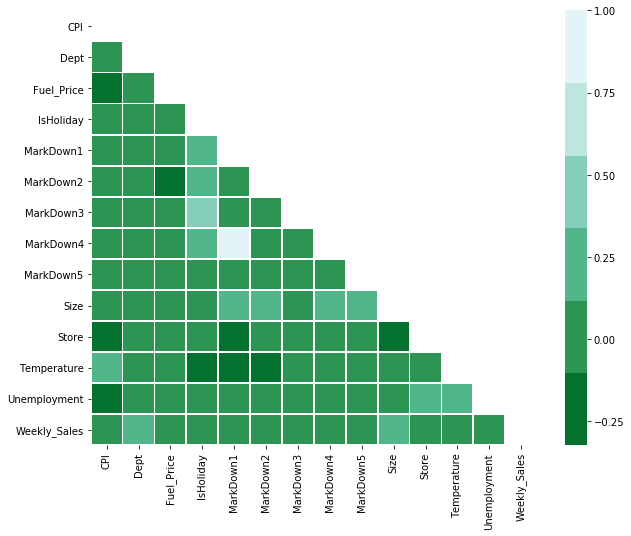

In [41]:
#plot correlation matrix of the raw dataset
plot_corr(df)

In [42]:
df.head()

,CPI,Date,Dept,Fuel_Price,IsHoliday,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,Size,Split,Store,Temperature,Type,Unemployment,Weekly_Sales
0,211.096358,2010-02-05,1,2.572,False,NaN,NaN,NaN,NaN,NaN,151315,Train,1,42.31,A,8.106,24924.50
1,211.096358,2010-02-05,2,2.572,False,NaN,NaN,NaN,NaN,NaN,151315,Train,1,42.31,A,8.106,50605.27
2,211.096358,2010-02-05,3,2.572,False,NaN,NaN,NaN,NaN,NaN,151315,Train,1,42.31,A,8.106,13740.12
3,211.096358,2010-02-05,4,2.572,False,NaN,NaN,NaN,NaN,NaN,151315,Train,1,42.31,A,8.106,39954.04
4,211.096358,2010-02-05,5,2.572,False,NaN,NaN,NaN,NaN,NaN,151315,Train,1,42.31,A,8.106,32229.38


In [43]:
# function to generate scatter plots
def generate_scatter_plots(df,feature):
    scatter(df[feature], df['Weekly_Sales'],alpha=0.5,color='green')

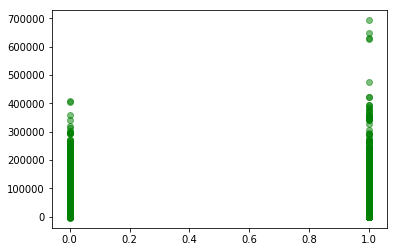

In [44]:
#here we can see that the sales are higher if it's a holiday
generate_scatter_plots(df,'IsHoliday') 

In [45]:
# function to assign new columns to dataframe with non-missing values
def feature_engineer_markdown(df):
    df = df.assign(ifMarkDown1 = df.MarkDown1.notnull())
    df = df.assign(ifMarkDown2 = df.MarkDown2.notnull())
    df = df.assign(ifMarkDown3 = df.MarkDown3.notnull())
    df = df.assign(ifMarkDown4 = df.MarkDown4.notnull())
    df = df.assign(ifMarkDown5 = df.MarkDown5.notnull())
    df.fillna(0, inplace=True)
    return df

In [46]:
df=feature_engineer_markdown(df) #lets stark with mardown feature

In [47]:
df['Type'] = 'Type_' + df['Type'].map(str)
df['Store'] = 'Store_' + df['Store'].map(str)
df['Dept'] = 'Dept_' + df['Dept'].map(str)

In [48]:
# convert categorical variable into dummy/indicator variables in some columns
type_dummies = pd.get_dummies(df['Type'])
store_dummies = pd.get_dummies(df['Store'])
dept_dummies = pd.get_dummies(df['Dept'])

In [49]:
# convert the date into the form suitable for analysis
df['DateType'] = [datetime.strptime(date, '%Y-%m-%d').date() for date in df['Date'].astype(str).values.tolist()]
df['Month'] = [date.month for date in df['DateType']]
df['Month'] =  df['Month'].map(str)
Month_dummies = pd.get_dummies(df['Month'] )

In [51]:
# find out if it si pre christmas or black friday time periods
df['Black_Friday'] = np.where((df['DateType']==datetime(2010, 11, 26).date()) | (df['DateType']==datetime(2011, 11, 25).date()), 'yes', 'no')
df['Pre_christmas'] = np.where((df['DateType']==datetime(2010, 12, 23).date()) | (df['DateType']==datetime(2010, 12, 24).date()) | (df['DateType']==datetime(2011, 12, 23).date()) | (df['DateType']==datetime(2011, 12, 24).date()), 'yes', 'no')

In [52]:
def add_dummies(df,feature):
    df[feature]=feature+'_'+df[feature].map(str)
    feature_dummy=pd.get_dummies(df[feature])
    df=pd.concat([df,feature_dummy],axis=1)
    return df

In [53]:
for feature in ['IsHoliday','Pre_christmas','Black_Friday'] :
    df=add_dummies(df,feature)
df.head()

,CPI,Date,Dept,Fuel_Price,IsHoliday,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,...,DateType,Month,Black_Friday,Pre_christmas,IsHoliday_False,IsHoliday_True,Pre_christmas_no,Pre_christmas_yes,Black_Friday_no,Black_Friday_yes
0,211.096358,2010-02-05,Dept_1,2.572,IsHoliday_False,0.0,0.0,0.0,0.0,0.0,...,2010-02-05,2,Black_Friday_no,Pre_christmas_no,1,0,1,0,1,0
1,211.096358,2010-02-05,Dept_2,2.572,IsHoliday_False,0.0,0.0,0.0,0.0,0.0,...,2010-02-05,2,Black_Friday_no,Pre_christmas_no,1,0,1,0,1,0
2,211.096358,2010-02-05,Dept_3,2.572,IsHoliday_False,0.0,0.0,0.0,0.0,0.0,...,2010-02-05,2,Black_Friday_no,Pre_christmas_no,1,0,1,0,1,0
3,211.096358,2010-02-05,Dept_4,2.572,IsHoliday_False,0.0,0.0,0.0,0.0,0.0,...,2010-02-05,2,Black_Friday_no,Pre_christmas_no,1,0,1,0,1,0
4,211.096358,2010-02-05,Dept_5,2.572,IsHoliday_False,0.0,0.0,0.0,0.0,0.0,...,2010-02-05,2,Black_Friday_no,Pre_christmas_no,1,0,1,0,1,0


In [54]:
# count how many weeks in each month had sales more than 20000,
# see that most productive months are Nov and Dec
df.loc[df['Weekly_Sales'] >200000,"Month"].value_counts()

12    67
11    66
2     12
4      4
8      3
3      3
9      2
5      2
10     2
6      1
1      1
Name: Month, dtype: int64

In [55]:
# count number of days that have sales more than 30000
# see that Black Frdiday period leads
df.loc[df['Weekly_Sales'] >300000,"Date"].value_counts()

2010-11-26    14
2011-11-25    13
2010-12-24     5
2011-12-23     2
Name: Date, dtype: int64

In [56]:
#creating two new features according Black Friday and Pre Christmas 
#since we know that the sales are much higher then
df['Black_Friday'] = np.where((df['DateType']==datetime(2010, 11, 26).date()) | 
                              (df['DateType']==datetime(2011, 11, 25).date()), 'yes', 'no')
df['Pre_christmas'] = np.where((df['DateType']==datetime(2010, 12, 23).date()) | 
                               (df['DateType']==datetime(2010, 12, 24).date()) | (df['DateType']==datetime(2011, 12, 23).date()) | 
                               (df['DateType']==datetime(2011, 12, 24).date()), 'yes', 'no')

In [28]:
# get median sales
def add_median_stats(df):
    medians = pd.DataFrame({'Median Sales' :df.loc[df['Split']=='Train'].groupby(by=['Type','Dept','Store','Month','IsHoliday'])['Weekly_Sales'].median()}).reset_index()
    df = df.merge(medians, how = 'outer', on = ['Type','Dept','Store','Month','IsHoliday'])
    df['Median Sales'].fillna(df['Median Sales'].loc[df['Split']=='Train'].median(), inplace=True) 
    df['Key'] = df['Type'].map(str)+df['Dept'].map(str)+df['Store'].map(str)+df['Date'].map(str)+df['IsHoliday'].map(str)
    return df,medians

In [29]:
df,medians = add_median_stats(df)

In [30]:
medians.head()

,Type,Dept,Store,Month,IsHoliday,Median Sales
0,Type_A,Dept_1,Store_1,1,IsHoliday_False,17350.585
1,Type_A,Dept_1,Store_1,10,IsHoliday_False,23388.030
2,Type_A,Dept_1,Store_1,11,IsHoliday_False,19551.115
3,Type_A,Dept_1,Store_1,11,IsHoliday_True,19865.770
4,Type_A,Dept_1,Store_1,12,IsHoliday_False,39109.390


In [31]:
df.head()

,CPI,Date,Dept,Fuel_Price,IsHoliday,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,...,Black_Friday,Pre_christmas,IsHoliday_False,IsHoliday_True,Pre_christmas_no,Pre_christmas_yes,Black_Friday_no,Black_Friday_yes,Median Sales,Key
0,211.096358,2010-02-05,Dept_1,2.572,IsHoliday_False,0.0,0.0,0.0,0.0,0.0,...,no,no,1,0,1,0,1,0,23510.49,Type_ADept_1Store_12010-02-05IsHoliday_False
1,211.289143,2010-02-19,Dept_1,2.514,IsHoliday_False,0.0,0.0,0.0,0.0,0.0,...,no,no,1,0,1,0,1,0,23510.49,Type_ADept_1Store_12010-02-19IsHoliday_False
2,211.319643,2010-02-26,Dept_1,2.561,IsHoliday_False,0.0,0.0,0.0,0.0,0.0,...,no,no,1,0,1,0,1,0,23510.49,Type_ADept_1Store_12010-02-26IsHoliday_False
3,212.566881,2011-02-04,Dept_1,2.989,IsHoliday_False,0.0,0.0,0.0,0.0,0.0,...,no,no,1,0,1,0,1,0,23510.49,Type_ADept_1Store_12011-02-04IsHoliday_False
4,213.247885,2011-02-18,Dept_1,3.045,IsHoliday_False,0.0,0.0,0.0,0.0,0.0,...,no,no,1,0,1,0,1,0,23510.49,Type_ADept_1Store_12011-02-18IsHoliday_False


In [32]:
# get previous week
def add_previous_week(df): 
    df['DateLagged'] = df['DateType']- timedelta(days=7)
    return df

In [33]:
df=add_previous_week(df)

In [34]:
# sort the dataset by store number, department and dateType
def create_sorted_df(df):
    sorted_df = df.sort_values(['Store', 'Dept','DateType'], ascending=[1, 1,1])
    sorted_df = sorted_df.reset_index(drop=True)
    return sorted_df

In [35]:
sorted_df=create_sorted_df(df)
#Handling the newly created feature
sorted_df['LaggedSales'] = np.nan 
sorted_df['LaggedAvailable'] = np.nan 
last=df.loc[0] 
row_len = sorted_df.shape[0]
for index, row in sorted_df.iterrows():
    lag_date = row["DateLagged"]
    if((last['DateType']== lag_date) & (last['Weekly_Sales']>0)): 
        sorted_df.set_value(index, 'LaggedSales',last['Weekly_Sales'])
        sorted_df.set_value(index, 'LaggedAvailable',1)
    else:
        sorted_df.set_value(index, 'LaggedSales',row['Median Sales']) # Fill with median
        sorted_df.set_value(index, 'LaggedAvailable',0)

    last = row 
    if(index%int(row_len/10)==0): 
        print(str(int(index*100/row_len))+'% loaded')

C:\Users\Hanna\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  del sys.path[0]
C:\Users\Hanna\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  
C:\Users\Hanna\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  # Remove the CWD from sys.path while we load stuff.
C:\Users\Hanna\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  # This is added back by InteractiveShellApp.init_path()


0% loaded
9% loaded
19% loaded
29% loaded
39% loaded
49% loaded
59% loaded
69% loaded
79% loaded
89% loaded
99% loaded


In [36]:
sorted_df[['Dept', 'Store','DateType','LaggedSales','Weekly_Sales','Median Sales']].head()

,Dept,Store,DateType,LaggedSales,Weekly_Sales,Median Sales
0,Dept_1,Store_1,2010-02-05,23510.49,24924.50,23510.49
1,Dept_1,Store_1,2010-02-12,24924.50,46039.49,37887.17
2,Dept_1,Store_1,2010-02-19,46039.49,41595.55,23510.49
3,Dept_1,Store_1,2010-02-26,41595.55,19403.54,23510.49
4,Dept_1,Store_1,2010-03-05,19403.54,21827.90,21280.40


In [37]:
# Merge by store and department
df = df.merge(sorted_df[['Dept', 'Store','DateType','LaggedSales','LaggedAvailable']], how = 'inner', on = ['Dept', 'Store','DateType'])


In [38]:
# get sales difference between median sales and previous week sales
def get_sales_diff(df):
    df['Sales_dif'] = df['Median Sales'] - df['LaggedSales']
    return df

In [39]:
df=get_sales_diff(df)

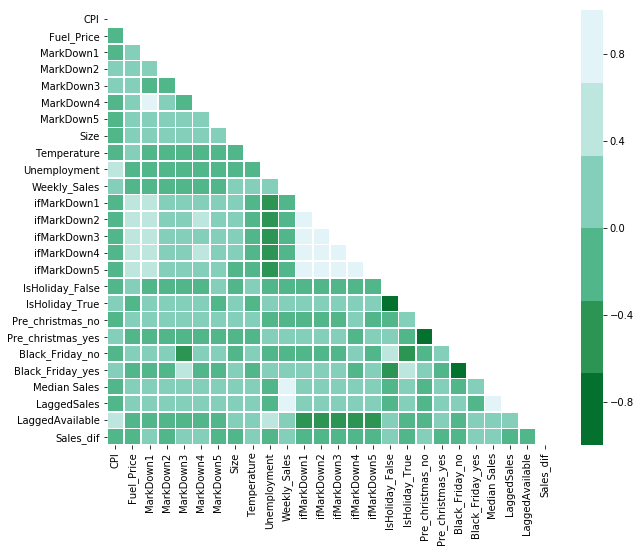

In [40]:
#plot correlation matrix
plot_corr(df)